# Substitution of mean value

Q.Write a program to substitute mean value in the place of outliers in the 'Ash,Sand & Dust used in Asphalt Production' column in the Solid Waste Generation dataset.

In [10]:
#Outliers detection and handling
import pandas as pd              #pandas use for data manipulation
import numpy as np
import seaborn as sns           # seaborn use for creating statistical data visualizations.

#reading data form the dataset into dataframe       #converting dataset into dataframe because  DataFrames are like organized spreadsheets for your data, making it easy to manipulate, analyze, and explore
data=pd.read_csv("F:\machine learning\Outliers__solid_waste_generation_recycling.1__csv__file.csv")
#finding no.of rows and columns in out data
data.shape

(16, 16)

In [11]:
#Renaming the column:Ash,sand & Dust used Asphalt Production as target column ,so that it will to write
#pass dictionary with old column name and new name
data.rename(columns={'Ash,Sand &Dust used':'target'},inplace=True)
df=data
#find outliers,sort on target column


The “inplace” parameter is often used in Pandas methods (and occasionally in other libraries) to determine whether an operation should modify the original object directly or return a modified copy.

In [13]:
#finding outliers,sort on target column
df= data.sort_values('target')

In [14]:
#display all rows of target column 0's cannot be outliers
df.iloc[:,5]

8     31193.0
10    56920.0
12    54578.0
13    31192.0
14    37882.0
2     43833.0
9     37882.0
0     35427.0
3     53353.0
1     39180.0
5     49796.0
11    44174.0
7     54578.0
6     39777.0
4     47302.0
15        NaN
Name: Appliances/White Goods, dtype: float64

<Axes: xlabel='target'>

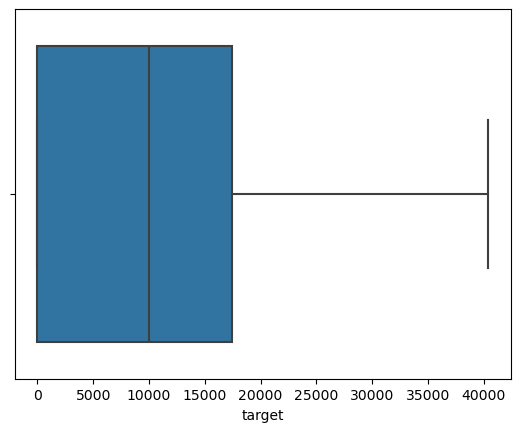

In [15]:
#finding the outliers by drawing graphs/plots
sns.boxplot(data=data,x='target')

In the above graph,the ouliers is after 40000

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


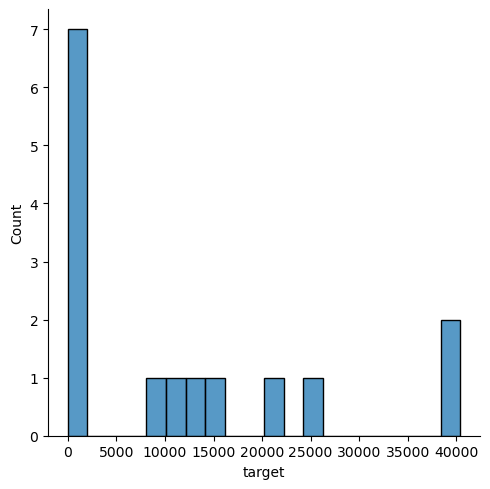

In [17]:
#show distribution plot
sns.displot(data=data,x='target',bins=20)

In [18]:
#calculating IQR
#first calculate q3(third quartile)
q3=data['target'].quantile(0.75)
q3

17476.0

In [19]:
#calculating q1(first quartile)
q1=data['target'].quantile(0.25)
q1

0.0

In [20]:
#find iqr
iqr=q3-q1
iqr

17476.0

In [21]:
#calculating upper and lower limits from iqr any value above ul or below ll is outliers.
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)

43690.0 -26214.0


In [22]:
#upper bound
upper=np.where(data['target']>=ul)
#lower bound
lower=np.where(data['target']<=ll)

#delete rows above upper and below lower values
data.drop(upper[0],inplace=True)
data.drop(upper[0],inplace=True)

In [23]:
#indexing method
#converting the target into array
arr=df['target'].values
arr
#if arr are in between ll and ul,represent that values as True else False
#False values are Outliers
true_index=(ll<arr)&(arr<ul)
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [24]:
#substitute mean value in the place of outliers
#so calculate mean of all values other than the outliers
mid=np.mean(data['target'][true_index])
mid

#replace all outliers with mean value, i.e False index
#values to be replaced
false_index=~ true_index
df['target'].values[false_index]=mid
df


,Year,Agriculture,Aluminum Cans,Unnamed: 3,Anti-freeze,Appliances/White Goods,Unnamed: 6,Unnamed: 7,target,Unnamed: 9,Asphalt/Concrete,Unnamed: 11,Batteries,Unnamed: 13,Unnamed: 14,Unnamed: 15
8,2008.0,31800.0,12842.0,NaN,5194.0,31193.0,NaN,NaN,0.0,NaN,2354878.0,NaN,26785.0,NaN,NaN,NaN
10,2010.0,55689.0,13655.0,NaN,4955.0,56920.0,NaN,NaN,0.0,NaN,2881220.0,NaN,19198.0,NaN,NaN,NaN
12,2012.0,102732.0,13635.0,NaN,6797.0,54578.0,NaN,NaN,0.0,NaN,1887580.0,NaN,23356.0,NaN,NaN,NaN
13,2013.0,97270.0,16679.0,NaN,4804.0,31192.0,NaN,NaN,0.0,NaN,2196139.0,NaN,21744.0,NaN,NaN,NaN
14,2014.0,66660.0,14309.0,NaN,4955.0,37882.0,NaN,NaN,0.0,NaN,2389936.0,NaN,19198.0,NaN,NaN,NaN
2,2002.0,0.0,12718.0,NaN,4506.0,43833.0,NaN,NaN,290.0,NaN,1455195.0,NaN,12158.0,NaN,NaN,NaN
9,2009.0,45431.0,21098.0,NaN,4804.0,37882.0,NaN,NaN,344.0,NaN,2196780.0,NaN,21548.0,NaN,NaN,NaN
0,2000.0,0.0,17994.0,NaN,2475.0,35427.0,NaN,NaN,10000.0,NaN,8932218.0,NaN,10757.0,NaN,NaN,NaN
3,2003.0,0.0,17608.0,NaN,4722.0,53353.0,NaN,NaN,10576.0,NaN,1600288.0,NaN,18780.0,NaN,NaN,NaN
1,2001.0,0.0,12540.0,NaN,4157.0,39180.0,NaN,NaN,12333.0,NaN,1116871.0,NaN,16297.0,NaN,NaN,NaN


# Note:
* Outliers are abnormal data points that are distinct from the normal data.
* Outliers can be detected by sorting the data.when the data is sorted,outliers can be found either in the beginning or at the extreme ending of the data.
* Outliers are displayed as data points away from normal data points in the graphs or plots.
* Inter Quartile Range(IQR)method shows upper and lower limits of the data.The data points not in these limits will become outliers.
* Due to outliers,the final results or conclusions drawn from the data will not be correct.
* we have to remove the outliers from the dataset or replace them with suitable values.